In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
train = pd.read_csv('/content/drive/MyDrive/Train.csv')

In [32]:
train.BiasInfluentialFactor.fillna('Other',inplace=True)

In [33]:
df = train.copy()
df = df.iloc[:,2:]

In [34]:
df =df.drop(['CurrentCTC','GraduationYear','Age'],axis=1)

## Classification

In [ ]:
X = df.drop(['BiasInfluentialFactor','FitmentPercent'],axis=1)
y = df['BiasInfluentialFactor']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
cat_features = np.where(X.dtypes == 'object')[0]

In [ ]:
# !pip install catboost

In [15]:
from catboost import CatBoostClassifier, Pool
clf = CatBoostClassifier(task_type='GPU',loss_function='MultiClass',verbose=0)
clf.fit(X_train,y_train,cat_features=cat_features, eval_set=(X_test,y_test),plot=True)

In [ ]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

In [ ]:
# !pip install shap

In [18]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

In [63]:
df.BiasInfluentialFactor.unique()

array(['YearsOfExperince', 'Other', 'Gender', 'DegreeBranch',
       'CurrentCompanyType', 'MartialStatus', 'HighestDegree', 'EmpScore',
       'Ethinicity', 'LatestDegreeCGPA'], dtype=object)

In [43]:
np.where(X.dtypes == 'object')[0]

array([ 0,  1,  2,  3,  4,  5,  9, 11, 12, 13])

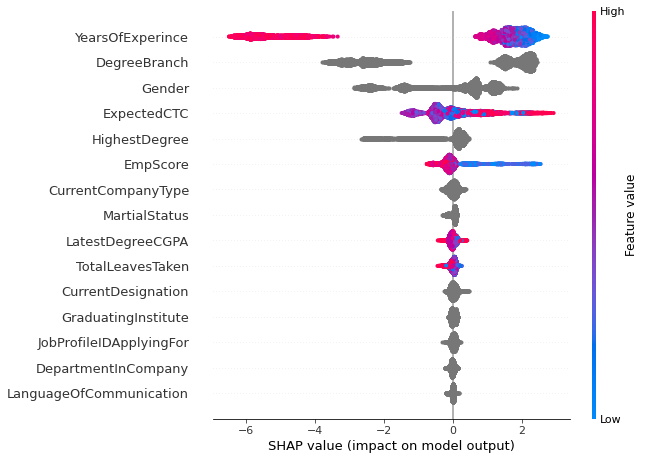

In [65]:
shap.summary_plot(shap_values[1], X)

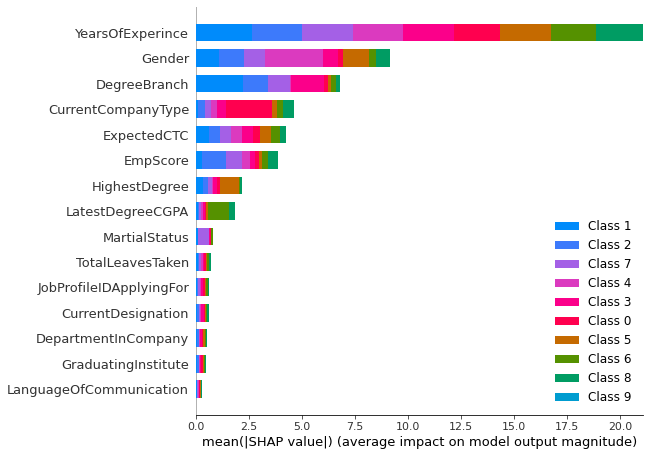

In [44]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

## Regression

In [36]:
X = df.drop(['BiasInfluentialFactor','FitmentPercent'],axis=1)
y = df['FitmentPercent']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [38]:
cat_features = np.where(X.dtypes == 'object')[0]

In [39]:
from catboost import CatBoostRegressor,Pool
reg = CatBoostRegressor(task_type='GPU',loss_function='RMSE',verbose=0)
reg.fit(X_train,y_train,cat_features=cat_features, eval_set=(X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

146.1008524470958

In [43]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

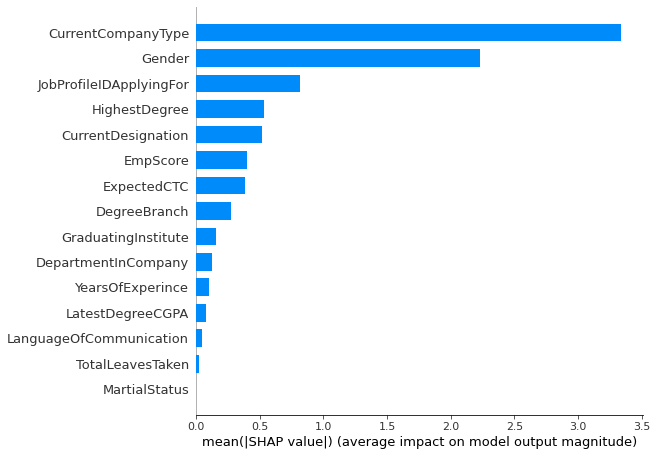

In [18]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

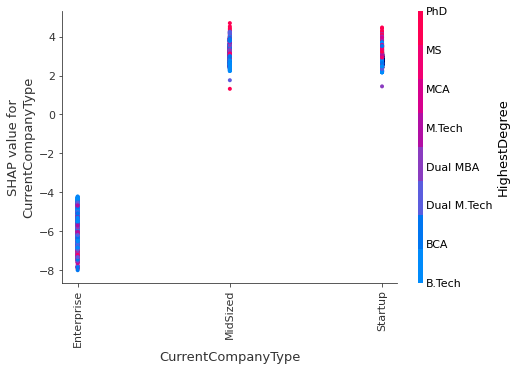

In [46]:
shap.dependence_plot(11, shap_values, X)

## for Test 

In [47]:
test = pd.read_csv('/content/drive/MyDrive/Test.csv')
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,5,2016,27,34,Single,4,SDE,Enterprise,Finance,18
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,12,2009,29,33,Married,4,EM,Enterprise,Engineering,8
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,2,2019,18,25,Married,3,SDE,Startup,Engineering,18
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,11,2010,7,12,Single,5,DS,Enterprise,Product,17
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,6,2015,22,32,Married,4,SDE,Startup,Engineering,9


In [48]:
df1 = test.copy()
df1 = df1.iloc[:,2:]

In [49]:
df1 =df1.drop(['CurrentCTC','GraduationYear','Age'],axis=1)

In [50]:
testpred = test[['EmpID']]

In [ ]:
testpred['BiasInfluentialFactor'] = clf.predict(df1)
testpred['FitmentPercent'] = np.array(list(map(lambda x: round(x,2), reg.predict(df1))))

In [ ]:
testpred.loc[testpred['BiasInfluentialFactor']=='Other','BiasInfluentialFactor'] = ''

In [ ]:
testpred.head()

In [ ]:
testpred.to_csv('result.csv',index=False)